<a href="https://colab.research.google.com/github/DenisseUrenda/MachineLearning/blob/main/L11_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
path = 'https://gist.githubusercontent.com/javierIA/403a1027bd6894f865a508652c338d20/raw/fd09d4255ce0ef4ab01eb6a5144c6c887f72045c/datos'
df = pd.read_csv(path)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,448.483826,0.403657,2.241913,29.621899,0.514768,0.431786,34.534323
std,258.849806,0.490976,0.836147,14.493108,0.931147,0.854517,52.968619
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.550000
75%,677.500000,1.000000,3.000000,38.000000,1.000000,1.000000,32.750000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [5]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
data = df[['Sex_male','Fare','Age','Pclass','SibSp','Survived']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp,Survived
0,1,7.2500,22.0,3,1,0
1,0,71.2833,38.0,1,1,1
2,0,7.9250,26.0,3,0,1
3,0,53.1000,35.0,1,1,1
4,1,8.0500,35.0,3,0,0


In [6]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.Survived

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25)

In [8]:
clf = RandomForestClassifier(n_estimators=20, min_samples_leaf=8,
                             max_leaf_nodes=100, random_state=2023)
clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=100, min_samples_leaf=8, n_estimators=20,
                       random_state=2023)

In [9]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7865168539325843
Confusion matrix: 
[[91 12]
 [26 49]]


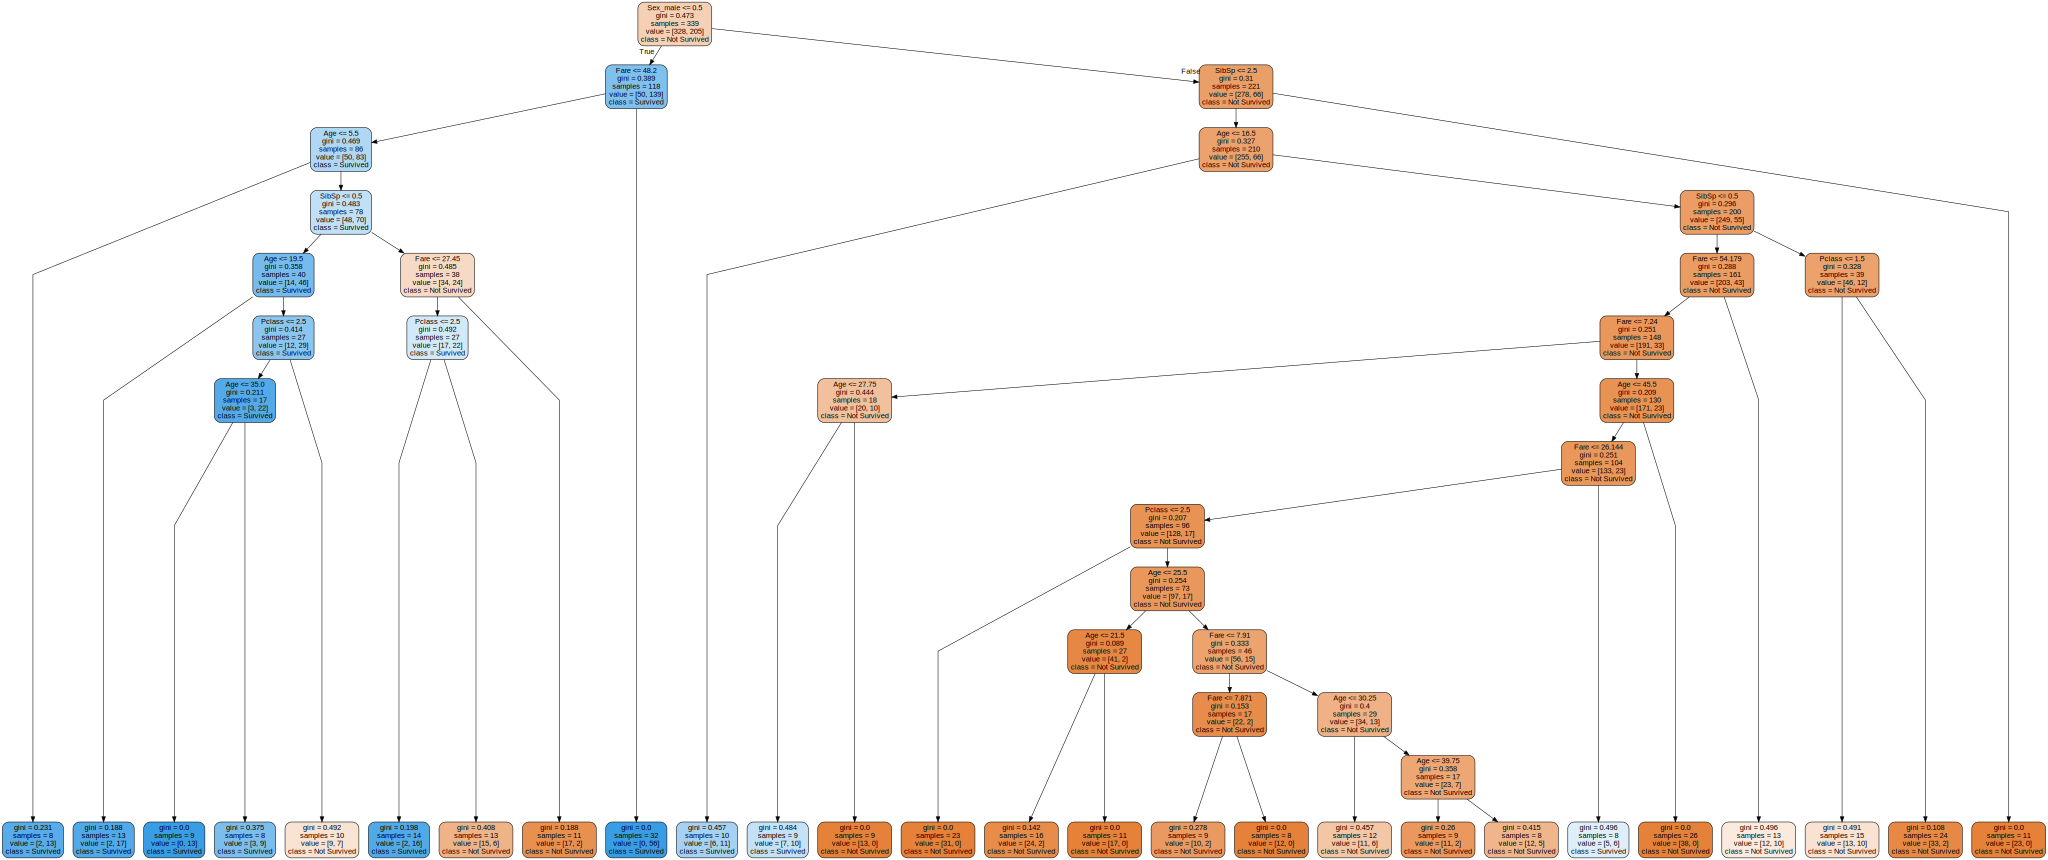

In [16]:
import graphviz

dot = tree.export_graphviz(clf[0], out_file=None, feature_names=X.columns,
                    class_names = ['Not Survived', 'Survived'],
                    filled=True, rounded=True, leaves_parallel=True)
graphviz.Source(dot)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

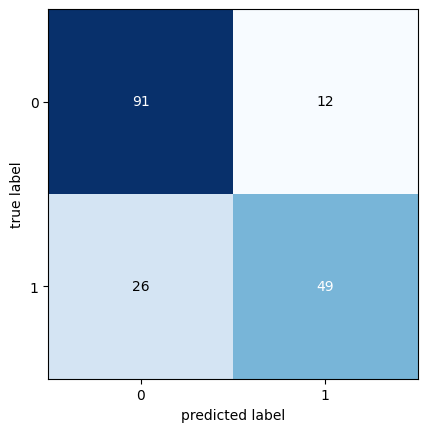

In [17]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred))